[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\chath/nltk_data'
    - 'D:\\ML_first_project\\env\\nltk_data'
    - 'D:\\ML_first_project\\env\\share\\nltk_data'
    - 'D:\\ML_first_project\\env\\lib\\nltk_data'
    - 'C:\\Users\\chath\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [8]:
pip install nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\chath/nltk_data'
    - 'D:\\ML_first_project\\env\\nltk_data'
    - 'D:\\ML_first_project\\env\\share\\nltk_data'
    - 'D:\\ML_first_project\\env\\lib\\nltk_data'
    - 'C:\\Users\\chath\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [10]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\chath\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [12]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize objects
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Replace words dictionary (example - you can customize this dictionary)
word_replacement = {
    'doctor': 'physiotherapist',
    'treatment': 'care',
    'medicine': 'medication',
    'expensive': 'high cost',
    'physiotherapist': 'physical therapist',
    'consultation': 'telemedicine consultation',
    'healthcare': 'telemedicine services',
    'clinic': 'online platform'
}

dataset = pd.read_csv('D:/ML_first_project/artifacts/doctorReviews (2).csv')

# Function for preprocessing
def preprocess(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)

    # Remove numbers
    text = re.sub(r'\d+', ' ', text)

    # Replace words
    text = ' '.join([word_replacement.get(word, word) for word in text.split()])

    # Tokenization and Stemming
    words = nltk.word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]

    return " ".join(words)

# Apply preprocessing to the reviews column
dataset["processed_reviews"] = dataset["reviews"].apply(preprocess)

# Build vocabulary using Counter
vocab = Counter()

# Update the vocabulary with words from each review
for sentence in dataset["processed_reviews"]:
    
    vocab.update(sentence.split())

# Print the most common words
print("Most Common Words:")
print(vocab.most_common(10))

# Convert vocabulary to binary (1 if the word exists in the review, else 0)
def convert_to_binary(vocab, text):
    words = nltk.word_tokenize(text)
    binary_rep = {word: 1 if word in words else 0 for word in vocab}
    return binary_rep

# Example of converting one review into binary representation
binary_representation = dataset["processed_reviews"].apply(lambda x: convert_to_binary(vocab, x))

# Add binary representation to the dataset (as a new column)
dataset["binary_representation"] = binary_representation

# Print a sample from the dataset
print(dataset.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words:
[('physiotherapist', 110), ('care', 47), ('patient', 46), ('time', 44), ('medic', 43), ('recommend', 33), ('test', 33), ('good', 31), ('explain', 30), ("n't", 29)]
   Unnamed: 0                                            reviews  labels  \
0          93  he explained initially that it takes 4-5 sitin...       0   
1          33  great dr definitely recommend he recommends le...       1   
2         129  doctor came and spent 9 seconds and recommende...       0   
3           7  i am completely satisfied with the consultatio...       1   
4          38  my experience was nice dr dyed was cool and co...       1   

        tag                                  processed_reviews  \
0  negative  explain initi take - site total care cost rupe...   
1  positive  great dr definit recommend recommend less medi...   
2  negative  physiotherapist came spent second recommend no...   
3  positive  complet satisfi telemedicin consult acut sever...   
4  positive  experi nice dr dy

In [16]:
vocab

Counter({'physiotherapist': 110,
         'care': 47,
         'patient': 46,
         'time': 44,
         'medic': 43,
         'recommend': 33,
         'test': 33,
         'good': 31,
         'explain': 30,
         "n't": 29,
         'problem': 28,
         'visit': 26,
         'appoint': 23,
         'hospit': 22,
         'experi': 21,
         'dr': 20,
         'friendli': 19,
         'issu': 19,
         'wait': 19,
         'consult': 18,
         'day': 17,
         '’': 17,
         'said': 17,
         'ask': 17,
         'satisfi': 16,
         'health': 16,
         'get': 16,
         'suggest': 16,
         'like': 15,
         'gave': 15,
         'happi': 15,
         "'s": 14,
         'need': 14,
         'give': 14,
         'even': 14,
         'check': 14,
         'take': 13,
         'listen': 13,
         'go': 12,
         'explan': 12,
         'way': 12,
         'onlin': 12,
         'went': 12,
         'peopl': 11,
         'avail': 11,
         '

In [17]:
len(vocab)

871

In [20]:
dataset.shape

(143, 6)

In [24]:
tokens=[key for key in vocab if vocab[key]>4]

In [22]:
vocab

Counter({'physiotherapist': 110,
         'care': 47,
         'patient': 46,
         'time': 44,
         'medic': 43,
         'recommend': 33,
         'test': 33,
         'good': 31,
         'explain': 30,
         "n't": 29,
         'problem': 28,
         'visit': 26,
         'appoint': 23,
         'hospit': 22,
         'experi': 21,
         'dr': 20,
         'friendli': 19,
         'issu': 19,
         'wait': 19,
         'consult': 18,
         'day': 17,
         '’': 17,
         'said': 17,
         'ask': 17,
         'satisfi': 16,
         'health': 16,
         'get': 16,
         'suggest': 16,
         'like': 15,
         'gave': 15,
         'happi': 15,
         "'s": 14,
         'need': 14,
         'give': 14,
         'even': 14,
         'check': 14,
         'take': 13,
         'listen': 13,
         'go': 12,
         'explan': 12,
         'way': 12,
         'onlin': 12,
         'went': 12,
         'peopl': 11,
         'avail': 11,
         '

In [25]:
len(tokens)

120

In [31]:
def save_vocabulary(lines,filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens,"D:/ML_first_project/static/model/vocabulary.txt")

In [32]:
data

NameError: name 'data' is not defined

In [33]:
dataset

,Unnamed: 0,reviews,labels,tag,processed_reviews,binary_representation
0,93,he explained initially that it takes 4-5 sitin...,0,negative,explain initi take - site total care cost rupe...,"{'explain': 1, 'initi': 1, 'take': 1, '-': 1, ..."
1,33,great dr definitely recommend he recommends le...,1,positive,great dr definit recommend recommend less medi...,"{'explain': 1, 'initi': 0, 'take': 0, '-': 0, ..."
2,129,doctor came and spent 9 seconds and recommende...,0,negative,physiotherapist came spent second recommend no...,"{'explain': 0, 'initi': 0, 'take': 0, '-': 0, ..."
3,7,i am completely satisfied with the consultatio...,1,positive,complet satisfi telemedicin consult acut sever...,"{'explain': 1, 'initi': 0, 'take': 0, '-': 0, ..."
4,38,my experience was nice dr dyed was cool and co...,1,positive,experi nice dr dy cool compos patient listen m...,"{'explain': 0, 'initi': 0, 'take': 0, '-': 0, ..."
...,...,...,...,...,...,...
138,110,dr is not ready to talk he writes for test and...,0,negative,dr readi talk write test ask meet later later ...,"{'explain': 1, 'initi': 0, 'take': 0, '-': 0, ..."
139,71,doc just spent 3-5 minutes time to review on f...,0,negative,doc spent - minut time review full bodi checku...,"{'explain': 0, 'initi': 0, 'take': 0, '-': 1, ..."
140,28,very friendly and his approach is also very go...,1,positive,friendli approach also good clearli explain pr...,"{'explain': 1, 'initi': 0, 'take': 0, '-': 0, ..."
141,119,overall had a very bad experience and the hosp...,0,negative,overal bad experi hospit profession,"{'explain': 0, 'initi': 0, 'take': 0, '-': 0, ..."


In [34]:
x=dataset['processed_reviews']
y=dataset['labels']

In [35]:
x

0      explain initi take - site total care cost rupe...
1      great dr definit recommend recommend less medi...
2      physiotherapist came spent second recommend no...
3      complet satisfi telemedicin consult acut sever...
4      experi nice dr dy cool compos patient listen m...
                             ...                        
138    dr readi talk write test ask meet later later ...
139    doc spent - minut time review full bodi checku...
140    friendli approach also good clearli explain pr...
141                  overal bad experi hospit profession
142    book appoint visit hospit could say worst expe...
Name: processed_reviews, Length: 143, dtype: object

In [36]:
y

0      0
1      1
2      0
3      1
4      1
      ..
138    0
139    0
140    1
141    0
142    0
Name: labels, Length: 143, dtype: int64

In [40]:
pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [46]:
x_train.shape

(114,)

In [47]:
x_test.shape

(29,)

### vectorization

In [50]:
import numpy as np

def vectorizer(ds,vocabulary):
    vectorized_lst=[]
    for sentence in ds:
        sentence_lst= np.zeros(len(vocabulary))
        for i in range (len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i]=1
        vectorized_lst.append(sentence_lst)
    vectorized_lst_new=np.asarray(vectorized_lst,dtype=np.float32)
    return vectorized_lst_new

In [51]:
vectorized_x_train=vectorizer(x_train,tokens)

In [52]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [53]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [54]:
vectorized_x_test=vectorizer(x_test,tokens)

In [55]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
y_train.value_counts()

labels
0    58
1    56
Name: count, dtype: int64

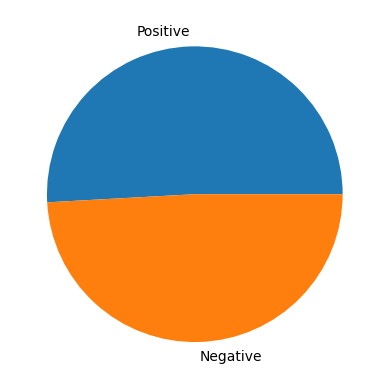

In [59]:
import matplotlib.pyplot as plt
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=["Positive", "Negative"])
plt.show()


### model training and evaluation

In [77]:
from sklearn.linear_model import LogisticRegression
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Ensemble methods (e.g., Random Forest and AdaBoost)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Support Vector Machine (SVM)
from sklearn.svm import SVC


In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
def training_scores(y_act, y_pred):
    """
    Calculate training performance metrics.

    Parameters:
    - y_act: Actual target labels
    - y_pred: Predicted labels

    Returns:
    - A dictionary containing accuracy, precision, recall, and F1 score
    """
    accuracy = accuracy_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred, average='binary')  # Change 'binary' if you have multi-class
    recall = recall_score(y_act, y_pred, average='binary')  # Change 'binary' if you have multi-class
    f1 = f1_score(y_act, y_pred, average='binary')  # Change 'binary' if you have multi-class

    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
def validation_scores(y_val_act, y_val_pred):
    """
    Calculate validation performance metrics.

    Parameters:
    - y_val_act: Actual target labels for the validation set
    - y_val_pred: Predicted labels for the validation set

    Returns:
    - A dictionary containing accuracy, precision, recall, and F1 score
    """
    accuracy = accuracy_score(y_val_act, y_val_pred)
    precision = precision_score(y_val_act, y_val_pred, average='binary')  # Adjust based on your class type
    recall = recall_score(y_val_act, y_val_pred, average='binary')
    f1 = f1_score(y_val_act, y_val_pred, average='binary')

    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


### Logistic Regression

In [79]:
lr=LogisticRegression()
lr.fit(vectorized_x_train,y_train)
y_train_pred=lr.predict(vectorized_x_train)
y_test_pred=lr.predict(vectorized_x_test)
print(training_scores(y_train, y_train_pred))
print(validation_scores(y_test, y_test_pred))

{'Accuracy': 0.9824561403508771, 'Precision': 0.9821428571428571, 'Recall': 0.9821428571428571, 'F1 Score': 0.9821428571428571}
{'Accuracy': 0.7241379310344828, 'Precision': 0.8888888888888888, 'Recall': 0.5333333333333333, 'F1 Score': 0.6666666666666666}


In [80]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(vectorized_x_train, y_train)
y_train_pred_nb = nb.predict(vectorized_x_train)
y_test_pred_nb = nb.predict(vectorized_x_test)

print("Naive Bayes Training Scores:")
print(training_scores(y_train, y_train_pred_nb))
print("Naive Bayes Validation Scores:")
print(validation_scores(y_test, y_test_pred_nb))


# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train, y_train)
y_train_pred_dt = dt.predict(vectorized_x_train)
y_test_pred_dt = dt.predict(vectorized_x_test)

print("Decision Tree Training Scores:")
print(training_scores(y_train, y_train_pred_dt))
print("Decision Tree Validation Scores:")
print(validation_scores(y_test, y_test_pred_dt))


# Random Forest Classifier (Ensemble Method)
rf = RandomForestClassifier()
rf.fit(vectorized_x_train, y_train)
y_train_pred_rf = rf.predict(vectorized_x_train)
y_test_pred_rf = rf.predict(vectorized_x_test)

print("Random Forest Training Scores:")
print(training_scores(y_train, y_train_pred_rf))
print("Random Forest Validation Scores:")
print(validation_scores(y_test, y_test_pred_rf))


# AdaBoost Classifier (Ensemble Method)
ab = AdaBoostClassifier()
ab.fit(vectorized_x_train, y_train)
y_train_pred_ab = ab.predict(vectorized_x_train)
y_test_pred_ab = ab.predict(vectorized_x_test)

print("AdaBoost Training Scores:")
print(training_scores(y_train, y_train_pred_ab))
print("AdaBoost Validation Scores:")
print(validation_scores(y_test, y_test_pred_ab))


# Support Vector Machine (SVM)
svm = SVC()
svm.fit(vectorized_x_train, y_train)
y_train_pred_svm = svm.predict(vectorized_x_train)
y_test_pred_svm = svm.predict(vectorized_x_test)

print("SVM Training Scores:")
print(training_scores(y_train, y_train_pred_svm))
print("SVM Validation Scores:")
print(validation_scores(y_test, y_test_pred_svm))


Naive Bayes Training Scores:
{'Accuracy': 0.9298245614035088, 'Precision': 0.8870967741935484, 'Recall': 0.9821428571428571, 'F1 Score': 0.9322033898305084}
Naive Bayes Validation Scores:
{'Accuracy': 0.7931034482758621, 'Precision': 0.8461538461538461, 'Recall': 0.7333333333333333, 'F1 Score': 0.7857142857142857}
Decision Tree Training Scores:
{'Accuracy': 0.9912280701754386, 'Precision': 1.0, 'Recall': 0.9821428571428571, 'F1 Score': 0.990990990990991}
Decision Tree Validation Scores:
{'Accuracy': 0.6206896551724138, 'Precision': 0.6428571428571429, 'Recall': 0.6, 'F1 Score': 0.6206896551724138}
Random Forest Training Scores:
{'Accuracy': 0.9912280701754386, 'Precision': 0.9824561403508771, 'Recall': 1.0, 'F1 Score': 0.9911504424778761}
Random Forest Validation Scores:
{'Accuracy': 0.7241379310344828, 'Precision': 0.8888888888888888, 'Recall': 0.5333333333333333, 'F1 Score': 0.6666666666666666}
AdaBoost Training Scores:
{'Accuracy': 0.9473684210526315, 'Precision': 0.9629629629629629

In [83]:
import pickle

# Corrected file path and mode
with open('D:/ML_first_project/static/model/model.pickle', 'wb') as file:
    pickle.dump(nb, file)
